# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in the context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * What are some basic statistics you can learn right away about this dataset?

I am trying to predict the amount of subscribers on a Youtube channel. I am personally really interested in this topic because I am trying to start a Youtube channel myself, so it is in my best interest to see what features lead to a succesful Youtube channel. 





How big is your dataset? (in terms of MB): 128 kb

How many entries does it have?: 5,000 entries

How many features does it have?: 6 features

What are some basic statistics you can learn right away about this dataset?: 

                       uploads	           subscribers	                         views
           
    count           4610.000000	            4.610000e+03	               4.610000e+03

    mean	        4085.745987	            2.621527e+06	               1.138403e+09

    std	            17726.160260	        3.927263e+06	               2.068706e+09

    min	            1.000000	            3.010000e+02	               7.500000e+01

    25%	            148.000000	            6.101925e+05	               2.189184e+08

    50%	            464.000000	            1.350884e+06	               5.368886e+08

    75%	            1592.500000	            2.950921e+06	               1.195115e+09

    max	            422326.000000	        6.599531e+07	               4.754884e+10

In [145]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade"; # required url to download for CSV file. The TA will need to download the file and run your program.




---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.


Correlations: 

subscribers    1.000000
views          0.791241
uploads        0.011362
Name: subscribers, dtype: float64

Clearly the only relevant feature is the amount of views.
I am only going to use the amount of total views on a Youtube channel
in order to predict the amount of subcribers that a channel has.



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


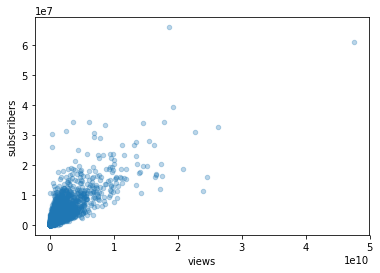

In [146]:
# You might want to use the following package
%matplotlib inline
from datascience import *
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt


# Dropping useless columns and changing the column names to make my life easier 
read_csv = pd.read_csv("data.csv")
read_csv = read_csv.drop(columns = ["Rank", "Channel name", "Grade"])
read_csv = read_csv.rename(columns = {"Video Uploads": "uploads", "Video views": "views", "Subscribers": "subscribers"})

# Removing useless rows with no information
read_csv = read_csv[read_csv["uploads"] != "-- "]
read_csv = read_csv[read_csv["subscribers"] != "-- "]
read_csv = read_csv[read_csv["uploads"] != "--"]
read_csv = read_csv[read_csv["subscribers"] != "--"]

# Casting strings to integers
uploads_ints = pd.to_numeric(read_csv["uploads"])
subscribers_ints = pd.to_numeric(read_csv["subscribers"])
read_csv['uploads'] = uploads_ints
read_csv['subscribers'] = subscribers_ints

# Plotting scatter plot to see the correlations visually 
plot = read_csv.plot(kind="scatter", x="views", y = "subscribers", alpha = 0.3)

# Looking for correlations 
print()
print("Correlations: ")
print()
corr_matrix = read_csv.corr()
print(corr_matrix["subscribers"].sort_values(ascending=False))
print()
print("Clearly the only relevant feature is the amount of views.")
print("I am only going to use the amount of total views on a Youtube channel")
print("in order to predict the amount of subcribers that a channel has.")
print()

# Splitting into training data and testing data
train_set, test_set = train_test_split(read_csv, test_size = 0.2, random_state = 42)


# Getting x training values 
x_train_values = train_set[['views']]


# Getting y training values 
y_train_values = train_set[['subscribers']]
y_train = y_train_values.values


# Getting x test values
x_test_values = test_set[['views']]


# Getting y test values
y_test_values = test_set[['subscribers']]
y_test = y_test_values.values

# Standard Scaler pipeline to normalize the x values
pipe = Pipeline([('std_scaler', StandardScaler())])


# Normalizing x training values with pipe
x_train_final = np.array(pipe.fit_transform(x_train_values))
ones = np.ones( (x_train_final.shape[0]))
x_train_final = np.c_[x_train_final, ones]


# Changing the variable name for consistency
y_train_final = y_train


# Normalizing x test values with pipe
x_test_final = np.array(pipe.fit_transform(x_test_values))
oness = np.ones( (x_test_final.shape[0]))
x_test_final = np.c_[x_test_final, oness]


# Changing the variable name for consistency
y_test_final = y_test




- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [154]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation
class MyLinearRegression:
    def __init__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0; # learning rate
        self.cost  = []; # cost function
    
    def fitUsingGradientDescent(self, x_train, y_train):
        iters = 1000
        theta = np.random.randn(x_train.shape[1], 1)
        alpha = 0.1
        self.gradientDescent(x_train, y_train, theta, alpha, iters)
        
    def gradientDescent(self, x_train, y_train, theta, alpha, iters):
        m = x_train.shape[0]
        for iteration in range(iters):
            gradients = 2/m * x_train.T.dot(x_train.dot(theta) - y_train)
            theta = theta - alpha * gradients
            c = 1/m * ((x_train.dot(theta) - y_train).T).dot(x_train.dot(theta) - y_train)
            self.cost.append(c[0][0])
        self.theta = theta
        
    def predict(self, x_test): 
        
        return x_test.dot(self.theta)
        
        
        #return y_predict
    
    def fitUsingNormalEquation(self, x_train, y_train): 
        self.theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
        


In [155]:
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(x_train_final, y_train_final)


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

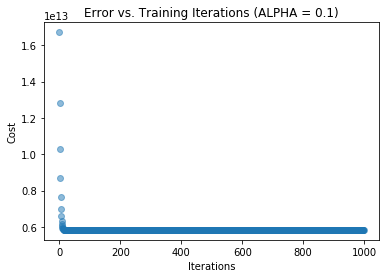

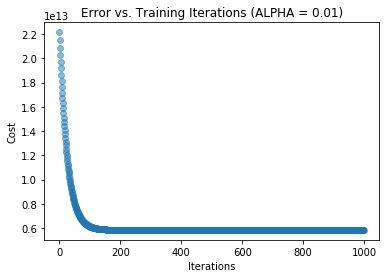

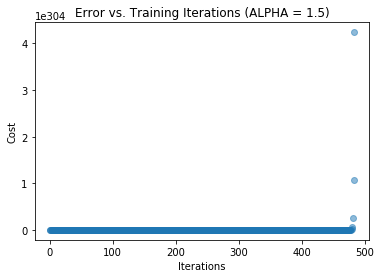

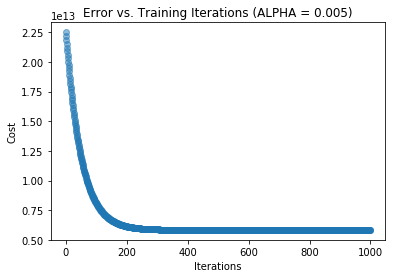



Best learning rate is 0.01


In [156]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.


# alpha = 0.1
x = np.arange(0, 1000)
y = myGradientDescentModel.cost

alpha0_1 = plt
alpha0_1.scatter(x, y, alpha = 0.5)
alpha0_1.xlabel('Iterations')  
alpha0_1.ylabel('Cost')  
alpha0_1.title('Error vs. Training Iterations (ALPHA = 0.1)') 
alpha0_1.show() 


# alpha = 0.01  
iters = 1000
theta = np.random.randn(x_train_final.shape[1], 1)
alpha = 0.01
myGradientDescentModel1 = MyLinearRegression()
myGradientDescentModel1.gradientDescent(x_train_final, y_train_final, theta, alpha, iters)
y1 = myGradientDescentModel1.cost

alpha0_01 = plt
alpha0_01.scatter(x, y1, alpha = 0.5)
alpha0_01.xlabel('Iterations')  
alpha0_01.ylabel('Cost')  
alpha0_01.title('Error vs. Training Iterations (ALPHA = 0.01)') 
alpha0_01.show() 


# alpha = 1.5
iters = 1000
theta = np.random.randn(x_train_final.shape[1], 1)
alpha = 1.5
myGradientDescentModel1 = MyLinearRegression()
myGradientDescentModel1.gradientDescent(x_train_final, y_train_final, theta, alpha, iters)
y1 = myGradientDescentModel1.cost

alpha0_9 = plt
alpha0_9.scatter(x, y1, alpha = 0.5)
alpha0_9.xlabel('Iterations')  
alpha0_9.ylabel('Cost')  
alpha0_9.title('Error vs. Training Iterations (ALPHA = 1.5)') 
alpha0_9.show() 


# alpha = 0.005
iters = 1000
theta = np.random.randn(x_train_final.shape[1], 1)
alpha = 0.005
myGradientDescentModel1 = MyLinearRegression()
myGradientDescentModel1.gradientDescent(x_train_final, y_train_final, theta, alpha, iters)
y1 = myGradientDescentModel1.cost

alpha0_9 = plt
alpha0_9.scatter(x, y1, alpha = 0.5)
alpha0_9.xlabel('Iterations')  
alpha0_9.ylabel('Cost')  
alpha0_9.title('Error vs. Training Iterations (ALPHA = 0.005)') 
alpha0_9.show() 

print()
print()
print("Best learning rate is 0.01")



- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [157]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(x_train, y_train)


- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

# SGD Regressor Model
mySGDModel = SGDRegressor()
mySGDModel.fit(x_train_final, y_train_final)
y_predict = mySGDModel.predict(x_test_final)
mse = mean_squared_error(y_test_final, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("error SGD Model: ", mySGDModel_rmse)

# Linear Regressor Model using Gradient Equation
myLinearRegressor1 = MyLinearRegression()
myLinearRegressor1.fitUsingGradientDescent(x_train_final, y_train_final)
y_predict_myNormalEquation = myLinearRegressor1.predict(x_test_final)
mse_myNormalEquation = mean_squared_error(y_test_final, y_predict_myNormalEquation)
my_rmse = np.sqrt(mse_myNormalEquation)
print("error NormalEquation: ", my_rmse)

# Linear Regressor Model using Normal Equation 
myLinearRegressor2 = MyLinearRegression()
myLinearRegressor2.fitUsingNormalEquation(x_train_final, y_train_final)
y_predict_gradient_descent = myLinearRegressor2.predict(x_test_final)
mse_gradient_descent = mean_squared_error(y_test_final, y_predict_gradient_descent)
my_rmse2 = np.sqrt(mse_gradient_descent)
print("error Gradient Descent: ", my_rmse2)


error SGD Model:  2434172.2838148866
error NormalEquation:  2376885.564353244
error Gradient Descent:  2376885.564353244


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


My gradient descent and normal equation implementations gave me the exact same RMSE error. This was expected because in theory, they should be the same if the local minimum of of the gradient descent equals the global minimum. 


The normal equation and gradient descent implementations actually gave me slightly better errors than the SGD Model! I was actually able to predict the amount of subscribers on a Youtube channel with an error of about 2,376,885 subscribers, which is pretty bad considering the mean amount of subscribers is 2,621,527. However, this error is slightly better than the error produced by the SGD Model (2,391,532). 


 



- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

After looking at all the possible features that might influence the amount of subscribers on a Youtube channel, I came to the conclusion that the only relevant one in the dataset was the total amount of views on the Youtube channel. 

The scatter plot implied that there was  is a positive direct correlation between the total amount of views on a Youtube channel and the subscribers on that channel. After implementing the solution, I learned that my model was not complicated enough and it had errors that were comparable to the mean of subscribers, which is generally not good. 

In order to improve this error in the future, I might need more features. Sadly, I did not have too many relevant features available to me in the Kaggle dataset. In addition to that, I could implement a more complicated non-linear model like a polynomial model. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4501oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 1:...".

Best of luck and have fun!